In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# smoothing the number of pixels in a frame 
def smooth(Pixels):
    win_gauss = signal.gaussian(10,3)
    smooth_Pixels = signal.convolve(Pixels, win_gauss, mode='same', method = 'direct') / win_gauss.sum()
    return(smooth_Pixels)

In [3]:
# read one of the csv files 
df = pd.read_csv('./data/c-1_m4.csv',skipinitialspace=True,usecols = ['NumPixel'])

In [4]:
df.columns

# if loaded all columns in the data, one could also drop some columns
# df.drop(['Unnamed: 0','Centroid_hull_x','Centroid_hull_y','Centroid_basic_x','Centroid_basic_y','Contour_basic','Contour_hull'], axis=1)

Index(['NumPixel'], dtype='object')

In [5]:
# what is the data type
df.dtypes

NumPixel    int64
dtype: object

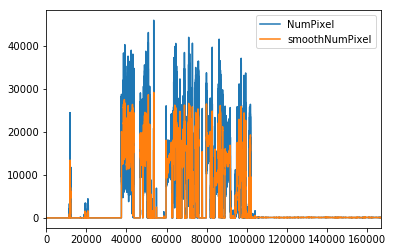

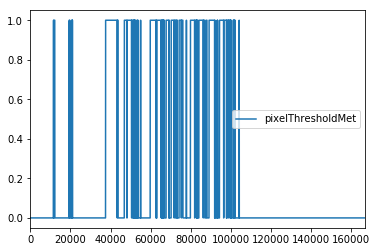

In [6]:
# plot signal, smoothed signal, and whether the treshold is met
df['smoothNumPixel'] =   smooth(  df.NumPixel)
df['pixelThresholdMet'] = (df.smoothNumPixel >  500 )*1   #*1 converts it into int, instead of boolean (useful later)

df.plot( y=['NumPixel','smoothNumPixel'] )
df.plot( y =['pixelThresholdMet'])
plt.show()

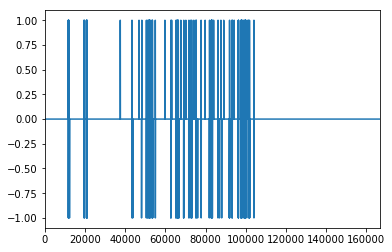

In [7]:
#differential shows when theshold changes sign 
df.pixelThresholdMet.diff().plot()
plt.show()

In [8]:
moth_enters_frame = df.index[ df.pixelThresholdMet.diff() ==1].values
moth_leaves_frame = df.index[ df.pixelThresholdMet.diff() ==-1].values

FramesMothInView = moth_leaves_frame- moth_enters_frame

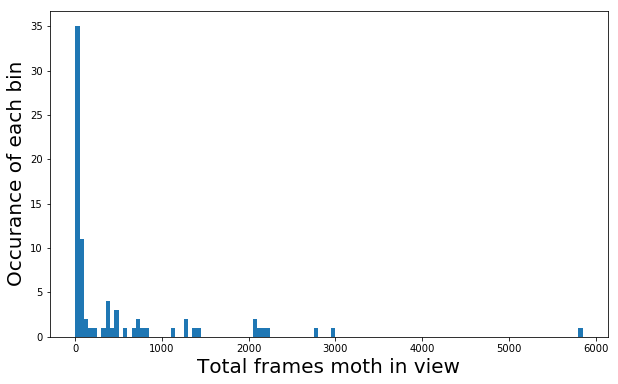

In [9]:
fig, ax = plt.subplots(1,1, figsize = (10,6))
binwidth = 50
plt.hist(FramesMothInView, bins=range(min(FramesMothInView), max(FramesMothInView) + binwidth, binwidth))
plt.xlabel("Total frames moth in view", fontsize = 20)
plt.ylabel("Occurance of each bin", fontsize = 20)
plt.show()

In [10]:

path = '.\\'
data_files = [(os.path.join(root, name), name[0:-4])
               for root, dirs, files in os.walk(path)
               for name in files
               if name.endswith('m4.csv')]

('.\\data\\c-1_m4.csv', 'c-1_m4')


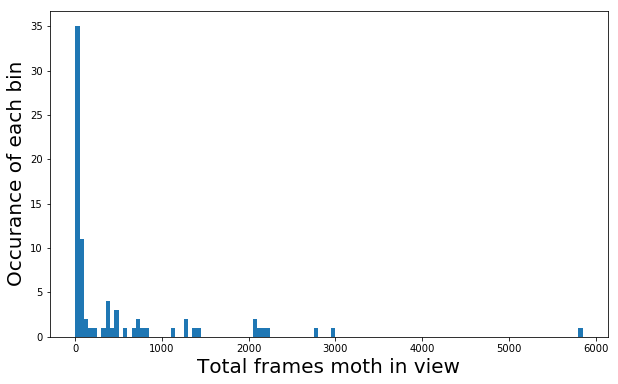

('.\\data\\c-2_m4.csv', 'c-2_m4')


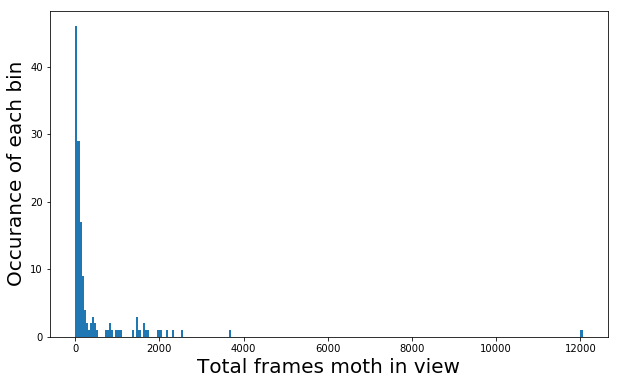

In [11]:
# now everything put together in a function 
def count_moth_frames(single_file,plot_on):
    print(single_file)
    
    # load data frame 
    df = pd.read_csv(single_file[0], skipinitialspace=True, usecols = ['NumPixel'])
    
    # smooth signal
    df['smoothNumPixel'] =   smooth(  df.NumPixel)
    # threshold smoothened signal
    df['pixelThresholdMet'] = (df.smoothNumPixel >  500 )*1   # times one converts it into int, instead of boolean

    # take the derivative of threshold boolean. If positive, moth entered, if negative, moth left
    # using df.index, find at which indices this happened 
    moth_enters_frame = df.index[ df.pixelThresholdMet.diff() ==1]
    moth_leaves_frame = df.index[ df.pixelThresholdMet.diff() ==-1]

    # needs exception for when moth is already in frame, or stays in frame when recording stops
    if (df[-1:].pixelThresholdMet == 1).bool:
        # moth still in frame when recording stopped 
        np.append( moth_leaves_frame, df.shape[0] )  
        
    if df.pixelThresholdMet[0] == 1: 
        # moth started in frame 
        np.append( 0, moth_enters_frame)

    FramesMothInView = moth_leaves_frame- moth_enters_frame
    
    if plot_on == True: 
        fig, ax = plt.subplots(1,1, figsize = (10,6))
        binwidth = 50
        plt.hist(FramesMothInView, bins=range(min(FramesMothInView), max(FramesMothInView) + binwidth, binwidth))
        plt.xlabel("Total frames moth in view", fontsize = 20)
        plt.ylabel("Occurance of each bin", fontsize = 20)
        plt.show()

    
# run the loop 
for file_name in data_files:
    count_moth_frames( file_name,True)

In [12]:
%%timeit
count_moth_frames( data_files[0],False)

('.\\data\\c-1_m4.csv', 'c-1_m4')
('.\\data\\c-1_m4.csv', 'c-1_m4')
('.\\data\\c-1_m4.csv', 'c-1_m4')
('.\\data\\c-1_m4.csv', 'c-1_m4')
1 loop, best of 3: 2.13 s per loop
